In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
data = pd.read_csv('restaurant-scores-lives-standard.csv',sep=",")

In [163]:
data.shape

(53973, 23)

In [164]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [165]:
# проверим есть ли пропущенные значения
isnull = data.isnull().sum()
print (isnull)

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64


## Для обработки пропусков возьмём один числовой признак(inspection_score) и категориальный признак (violation_description)

Будем использовать методику импьютации, т.к. были выбраны столбцы с не огромными пропусками данных (максимум 25%) 

In [166]:
dataint = data['inspection_score']
dataint.head()

0     NaN
1    96.0
2     NaN
3     NaN
4     NaN
Name: inspection_score, dtype: float64

In [167]:
num_cols=[]
for col in data.columns:
    if col=='inspection_score':
        num_cols.append(col)

In [168]:
sort_null_data = data[num_cols]
data_inspection = sort_null_data[['inspection_score']]

In [169]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [170]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_inspection)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

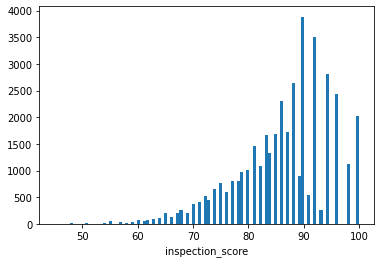

In [171]:
for col in num_cols:
    plt.hist(data[col], 100)
    plt.xlabel(col)
    plt.show()

In [172]:
num_cols_inspection_score = sort_null_data
num_cols_inspection_score.head()

,inspection_score
0,NaN
1,96.0
2,NaN
3,NaN
4,NaN


In [173]:

indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(num_cols_inspection_score)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [174]:
strategies=['mean', 'median', 'most_frequent']

In [175]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(num_cols_inspection_score)
    return data_num_imp[mask_missing_values_only]

In [176]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([86.22679186, 86.22679186, 86.22679186, ..., 86.22679186,
        86.22679186, 86.22679186]))

In [177]:
strategies[1], test_num_impute(strategies[1])

('median', array([87., 87., 87., ..., 87., 87., 87.]))

In [178]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([90., 90., 90., ..., 90., 90., 90.]))

## Возьмём моду для значений пропусков

In [179]:
imp_num = SimpleImputer(strategy=strategies[2])
data_int_full = imp_num.fit_transform(num_cols_inspection_score)
data_int_full

array([[90.],
       [96.],
       [90.],
       ...,
       [92.],
       [76.],
       [80.]])

In [180]:
num_cols_inspection_score_new = num_cols_inspection_score
num_cols_inspection_score_new = data_int_full
nmp = num_cols_inspection_score.to_numpy
data.iloc[:,12] = num_cols_inspection_score_new
##data.replace({'inspection_score' : { nmp : num_cols_inspection_score_new}})
data['inspection_score']


0        90.0
1        96.0
2        90.0
3        90.0
4        90.0
         ... 
53968    80.0
53969    90.0
53970    92.0
53971    76.0
53972    80.0
Name: inspection_score, Length: 53973, dtype: float64

In [181]:
isnull = data.isnull().sum()
print (isnull)

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score                 0
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64


## Получается мы заполнили столбец новыми данными

# Обработка категориальных признаков

In [182]:
num_cols=[]
for col in data.columns:
    if col=='violation_description':
        num_cols.append(col)

In [183]:
sort_null_data_obj = data[num_cols]
data_Desc = sort_null_data_obj[['violation_description']]
data_Desc.head()

,violation_description
0,NaN
1,Inadequately cleaned or sanitized food contact...
2,NaN
3,NaN
4,High risk vermin infestation


In [184]:
implicator = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
Desc_values = implicator.fit_transform(data_Desc)
Desc_values

array([['NA'],
       ['Inadequately cleaned or sanitized food contact surfaces'],
       ['NA'],
       ...,
       ['Foods not protected from contamination'],
       ['Inadequate food safety knowledge or lack of certified food safety manager'],
       ['Food safety certificate or food handler card not available']],
      dtype=object)

In [185]:
data_Desc['violation_description'].unique()

array([nan, 'Inadequately cleaned or sanitized food contact surfaces',
       'High risk vermin infestation',
       'Moderate risk food holding temperature',
       'Improper storage use or identification of toxic substances',
       'Improper or defective plumbing', 'No hot water or running water',
       'Inadequate and inaccessible handwashing facilities',
       'Low risk vermin infestation',
       'Insufficient hot water or running water',
       'Foods not protected from contamination', 'Improper food storage',
       'Unapproved or unmaintained equipment or utensils',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Food safety certificate or food handler card not available',
       'Improper thawing methods', 'Improper cooling methods',
       'Unclean or degraded floors walls or ceilings',
       'Inadequate food safety knowledge or lack of certified food safety manager',
       'Other low risk violation',
       'Inadequate procedures or 

In [186]:
data_frame = pd.DataFrame({'violation_description': Desc_values.T[0]})

In [187]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [188]:
data_frame.head(10)

,violation_description
0,NA
1,Inadequately cleaned or sanitized food contact...
2,NA
3,NA
4,High risk vermin infestation
5,NA
6,NA
7,Inadequately cleaned or sanitized food contact...
8,Moderate risk food holding temperature
9,NA


In [189]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(data_Desc)
data_imp2

array([['Unclean or degraded floors walls or ceilings'],
       ['Inadequately cleaned or sanitized food contact surfaces'],
       ['Unclean or degraded floors walls or ceilings'],
       ...,
       ['Foods not protected from contamination'],
       ['Inadequate food safety knowledge or lack of certified food safety manager'],
       ['Food safety certificate or food handler card not available']],
      dtype=object)

In [190]:
data.iloc[:,15] = data_imp2
data['violation_description']


0             Unclean or degraded floors walls or ceilings
1        Inadequately cleaned or sanitized food contact...
2             Unclean or degraded floors walls or ceilings
3             Unclean or degraded floors walls or ceilings
4                             High risk vermin infestation
                               ...                        
53968    Inadequately cleaned or sanitized food contact...
53969         Unclean or degraded floors walls or ceilings
53970               Foods not protected from contamination
53971    Inadequate food safety knowledge or lack of ce...
53972    Food safety certificate or food handler card n...
Name: violation_description, Length: 53973, dtype: object

In [191]:
one = OneHotEncoder()
data_label_hot = one.fit_transform(data_frame)

In [192]:
data_label_hot

<53973x66 sparse matrix of type '<class 'numpy.float64'>'
	with 53973 stored elements in Compressed Sparse Row format>

In [193]:
data_label_hot.todense()[0:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

### Для дальнейшего построения моделей я буду использовать карелирующие признаки, потому что на их основе можно построить более качественные модели машинного обучения. Также приоритет получат те признаки, в которых отсутствует пропуск данных или он минимален.